In [2]:
import math
import vivi
import pyxfoil
import numpy as np
import matplotlib.pyplot as plt
import mses

from scipy import integrate

### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package
#No Background fill, legend font scale, frame on legend
sns.set(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)
#Get color cycle for manual colors
colors = sns.color_palette() 
#SET MATPLOTLIB DEFAULTS
    #(call after seaborn, which changes some defaults)
params = {
        #FONT SIZES
        'axes.labelsize' : 30, #Axis Labels
        'axes.titlesize' : 30, #Title
        'font.size'      : 28, #Textbox
        'xtick.labelsize': 22, #Axis tick labels
        'ytick.labelsize': 22, #Axis tick labels
        'legend.fontsize': 24, #Legend font size
        'font.family'    : 'serif',
        'font.fantasy'   : 'xkcd',
        'font.sans-serif': 'Helvetica',
        'font.monospace' : 'Courier',
        #AXIS PROPERTIES
        'axes.titlepad'  : 2*6.0, #title spacing from axis
        'axes.grid'      : True,  #grid on plot
        'figure.figsize' : (6,6),   #square plots
        'savefig.bbox'   : 'tight', #reduce whitespace in saved figures
        #LEGEND PROPERTIES
        'legend.framealpha'     : 0.5,
        'legend.fancybox'       : True,
        'legend.frameon'        : True,
        'legend.numpoints'      : 1,
        'legend.scatterpoints'  : 1,
        'legend.borderpad'      : 0.1,
        'legend.borderaxespad'  : 0.1,
        'legend.handletextpad'  : 0.2,
        'legend.handlelength'   : 1.0,
        'legend.labelspacing'   : 0,
}
import matplotlib
matplotlib.rcParams.update(params) #update matplotlib defaults, call after seaborn
### END OF BOILERPLATE ##################################################



# EAE 127 Project 5 Supplement - Viscous Effects

### Problem 1 - Boundary Layer Properties

During this project, we'll be taking a break from implementing our panel methods and looking into the effects of viscosity in our aerodynamics analysis. The biggest consequence of a viscous flow is that we have a boundary layer on any surface within that flow. AS a reminder, a boundary layer is the thin layer of fluid that results from the fluid flowing along the surface. In real viscous flows, the velocity of the flow directly at the surface will be 0. As we move away from the boundary layer this velocity will increase until it reaches the freestream velocity. We'll discuss a little more about the boundary layer throughout this project. Lets take a look at the first few problems 

### Problem 1.1 - Flight Conditions

This problem is pretty straightforward. All we need to do is calculate the Reynold's number for each type of boundary layer. Use the following equation and report the value for both boundary layers in your code.

$$Re = \frac{\rho u_{\infty} L}{\mu}$$


### Problem 1.2 - Flight Conditions

Problem 1.2 is very similar to a task you had in Project 0. Here, we are plotting two boundary layer profiles. To plot the laminar profile we use the following equation:

&nbsp; &nbsp; &nbsp; &nbsp; 
$\left.\begin{matrix}
\frac{u}{u_{e}}
\end{matrix}\right|_{lam} =(\frac{2y}{\delta} - \frac{y^2}{\delta^2}) $ and use the following equation for laminar boudnary layer thickness: $\delta(x)_{lam} = \frac{5.0x}{\sqrt{Re_{x}}}$

To plot the turbulent profile we use the following equations:

&nbsp; &nbsp; &nbsp; &nbsp;
$
\left.\begin{matrix}
\frac{u}{u_{e}}
\end{matrix}\right|_{turb} =\left ( \frac{y}{\delta} \right )^\frac{1}{7} $ and use the following equation for turbulent boudnary layer thickness $\delta(x)_{turb} = \frac{0.16x}{(Re_{x})^\frac{1}{7}}$

You'll need to create two plots, and both plots need to have a laminar and turbulent profile (2 plots, each with 2 lines). One plot will be non-dimensional, where you use unon and ynon as your variables for $\frac{u}{u_{e}}$ and $\frac{y}{\delta}$. One plot will be dimensional, where you'll need to use the equations for $\delta$, as well as divide the values of unon by the freestream velocity. 

### Problem 1.3 - Friction Drag

Finally, to complete problem 1, you'll just need to calculate the friction drag. Use the equations in the Project Statement, and make sure to recalculate the Reynolds number using the chord length of the antenna (6 inches). Use that Reynolds number in your calculation of Drag coefficient for both laminar and turbulent boundary layers. 

As a reminder, make sure to report and designate all of your calculations in your report so that it is easy to tell what you did. 

### Problem 2 - Airfoil Boundary Layer Thickness

Problem 2 is a little more complex, we will be putting together a simple visualization for the boundary layer thickness over an airfoil. As with Problem 1 we'll be using a flat plate approximation for the airfoil boundary layer. Lets start out this problem by getting the relevant data for our airfoil from pyxfoil. Once we have the airfoil geometry in our variables, we'll need to do some manipulation to set things up correctly. To start, you should make a copy of the airfoil variables and then split those copies in half (we would like to manipulate the upper and lower surfaces independently).

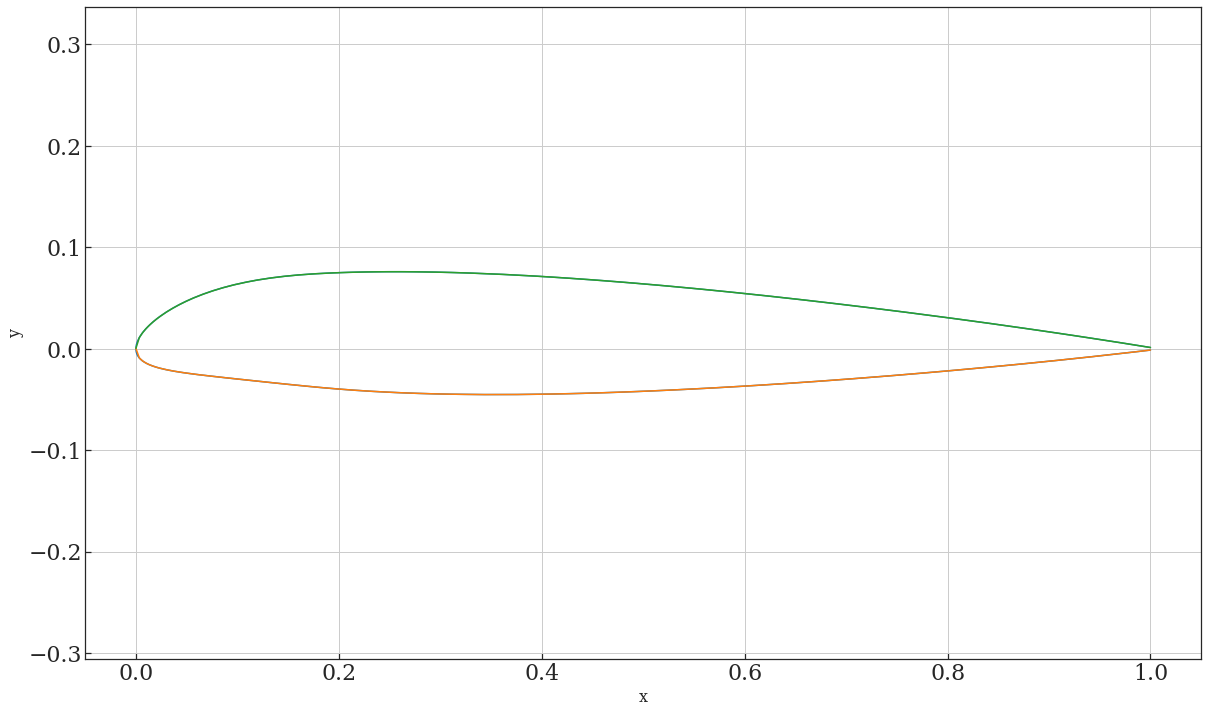

In [54]:
foil = '23012'
naca = True

# Our reynolds number doesn't matter here because we just need the geometry data.
Re = 0
alf = 0

pyxfoil.GetPolar(foil, naca, alf, Re)
filename = 'Data/naca23012/naca23012.dat'

x, z = np.loadtxt(filename, unpack = True, skiprows = 1)

# Lets quickly make a plot of our airfoil

plt.figure(figsize = (20,12))
plt.grid(True)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, z)
plt.axis('equal')




foil = '23012'
naca = True

# Our reynolds number doesn't matter here because we just need the geometry data.
Re = 5*(10**5)
alf = 12

pyxfoil.GetPolar(foil, naca, alf, Re)
# filename = 'Data/naca23012/naca23012.dat'
filename = 'Data/naca23012/naca23012_surfCP_Re5.00e+05a12.0.dat'
x, y, Cp = np.loadtxt(filename, unpack = True, skiprows = 3)

# We'll use the following function to split up the airfoil coordinates.
# We have the upper and lower sides of our coordinates. Try to print these functions to make sure they are correctly split
x_upper, x_lower = mses.MsesSplit(x, x)
y_upper, y_lower = mses.MsesSplit(x, y)
Cp_up, Cp_lo = mses.MsesSplit(x,Cp)

# We'll need to do a quick interpolation to make sure all of these values have the same size

xnew = np.linspace(0, 1, 300)

y_lower = np.interp(xnew, x_lower, y_lower)
y_upper = np.interp(xnew, x_upper, y_upper)


plt.plot(xnew, y_lower)
plt.plot(xnew, y_upper)
plt.show()

# Based on the below plot, we have a pretty good approximation of our airfoil



Here, all we've done is split up our variables, and set them up so they'll be easy to manipulate. Our next steps should be as follows:

&nbsp; &nbsp; &nbsp; &nbsp; 1.) Calculate the Reynolds number at every point along the airfoil using the variable x_lower. 

&nbsp; &nbsp; &nbsp; &nbsp; 2.) Use a Reynolds number of Re = 5 x 10^5 as your Reynolds number for transition from laminar to turbulent boundary layer. When your Reynolds number is below this value, use the laminar calculation of boundary layer thickness from Problem 1. When Re is above 5x10^5, use the turbulent equations to calculate the boundary layer thickness. 

&nbsp; &nbsp; &nbsp; &nbsp; 3.) The values for your boundary layer thickness should all be stored in the same variable. Once you have calculated all the boundary layer values, you will need to add the boundary layer thickness to the upper surface, and subtract it from the lower surface. 

&nbsp; &nbsp; &nbsp; &nbsp; 4.) Replot the upper and lower surfaces on the same plot as the airfoil. 

The most difficult part of this problem is figuring out how to calculate the boundary layer thickness using different equations when Re reaches a certain value (step 2). This can be done most easily using a for loop. Lets take a look at how to set this part up. 

In [56]:
# First step should be to calculate our Reynolds number along the airfoil using the x coordinates of our airfoil. 
# Here, we need to set the constants as well as our coordinates
rho = 
vel = 
mu = 

Re_x = ()*()*(xnew) / ()
n = len(Re_x)

# Make sure that Re_x is an array of 300 points
# Re_x holds the Reynolds number along our airfoil surface. 
# Now we should set up a for loop that steps through every element of this array and compares it to our transition Reynolds number

# We would like to fill in an array that holds our boundary layer thicknesses
delta = np.zeros(n,1)

for i in range(1,n):
    if Re_x[i] < Re_T:
        # Fill in with the corresponding equation for laminar flow
        delta[i] = ...
    else
        # Fill in with the corresponding equation for turbulent flow
        delta[i] = ...
    

SyntaxError: invalid syntax (<ipython-input-56-a565f0b128bc>, line 3)

&nbsp; &nbsp; &nbsp; &nbsp; Once you've completed the above code, all you need to do is add the value of delta to your upper surface array and subtract the value from your lower surface array. Add those arrays to your plot and comment on your results. 

### Problem 2.2 - Favorable and Adverse Pressure Gradients

This problem is pretty straightforward, you'll just be running pyxfoil simulations for 3 different cases.

* Laminar Reynolds number

* Transition Reynolds number ($Re_{cr} = 5e5$)

* Turbulent Reynolds number

You can choose the Reynolds numbers for laminar and turbulent, but you should try to use a value two magnitudes greater and two magnitudes less than the transition Reynolds number. Run these pyxfoil simulations at angle of attack of $2^o$. Plot the surface pressure of each of these cases and split them using MsesSplit() so that they are in upper and lower sides. Report where you have a favorable pressure gradient and an adverse pressure gradient for each case. Comment on if these locations differ much for different Reynold's numbers. 

Finally, repeat the analysis for an angle of attack of $8^o$ and an angle of attack of $12^o$. Examine the changes in the plots and answer the questions in the problem statement.

In [ ]:
Re = 6*(10**8)
alf = 12

pyxfoil.GetPolar(foil, naca, alf, Re)
# filename = 'Data/naca23012/naca23012.dat'
filename = 'Data/naca23012/naca23012_surfCP_Re6.00e+08a12.0.dat'
x, y, Cp = np.loadtxt(filename, unpack = True, skiprows = 3)

xup, xlo = mses.MsesSplit(x, x)
Cp_up, Cp_lo = mses.MsesSplit(x,Cp)

plt.figure(figsize = (20,12))
plt.grid(True)
plt.plot(xlo, Cp_lo, marker = 'o', linestyle = '-.', color = 'r')
plt.plot(xup, Cp_up, marker = 'o', linestyle = '-.', color = 'b')
plt.gca().invert_yaxis()
plt.show()



Re = 4*(10**4)
alf = 12

pyxfoil.GetPolar(foil, naca, alf, Re)
# filename = 'Data/naca23012/naca23012.dat'
filename = 'Data/naca23012/naca23012_surfCP_Re4.00e+04a12.0.dat'
x, y, Cp = np.loadtxt(filename, unpack = True, skiprows = 3)

xup, xlo = mses.MsesSplit(x, x)
Cp_up, Cp_lo = mses.MsesSplit(x,Cp)

plt.figure(figsize = (20,12))
plt.grid(True)
plt.plot(xlo, Cp_lo, marker = 'o', linestyle = '-.', color = 'r')
plt.plot(xup, Cp_up, marker = 'o', linestyle = '-.', color = 'b')
plt.gca().invert_yaxis()
plt.show()

### Problem 3 - Viscous/Inviscid Interation

### Problem 3.1 - Dividing Streamline Displacement

&nbsp; &nbsp; &nbsp; &nbsp; The final problem in this project will be a bit more involved. Here we are going to introduce a new tool that will be used to analyze the effects of the boundary layer on our airfoil and the resulting flows. Your first step is to download the VIvI code that is provided on canvas. As a reminder, this is a module similar to pyxfoil. You don't need to include the entire file in your code, but you should make sure to import it in your py script as well as your Jupyter notebook. This will give you access to all of the functions and tools you need without needing you to individually copy and paste all of the code.

If you open the VIvI code, you can see some of the functions you'll be using to complete this problem. Lets take a look at the most important function. Our goal will be to run this function multiple times in order to arrive at an iterative solution for boundary layer thickness and viscous decambering. 

In [1]:

name = 'naca23012'
solution = vivi.VIvI(name, 0, niter=0, Vinf=2, mu=1.79E-5, rho=1.225)
# This is just an example of how you might run the code. Lets take a look at the results.

solution1 = vivi.VIvI(name, 0, niter=1, Vinf=2, mu=1.79E-5, rho=1.225)

solution3 = vivi.VIvI(name, 0, niter=3, Vinf=2, mu=1.79E-5, rho=1.225)

wid = 14
fig = plt.figure(figsize=(wid,wid/4)) #save figure object as variable
ax = fig.add_subplot(1, 1, 1)   #use axis object to modify figure
ax.set_title( 'VIvI Geometry Iterations')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis('equal')

#Plot Original Geometry
ax.plot(solution['up']['x'], solution['up']['z'], color='k', linestyle='--')
ax.plot(solution['lo']['x'], solution['lo']['z'], color='k', linestyle='--')

# Lets also plot the camber line for these results. 
ax.plot(solution['lo']['x'], (solution['up']['z'] + solution['lo']['z'])/2, color='k', linestyle='--')


plt.show()





NameError: name 'vivi' is not defined

&nbsp; &nbsp; &nbsp; &nbsp; In the above code, you've been provided an example of how to run the VIvI tool and acquire the results of a viscous flow on a surface. What you see above is the result for 0 iterations of our VIvI tool. This is the original geometry of our airfoil. On your own you should try to change the niter value in the function call from 0 to 1, 1 to 2 and then 2 to 3. What you should notice is that the geometry will change each time. Your task is to run 0, 1, 2 and 3 iterations and plot the resulting geometries on the same plot. For your final plot and results, you need to recreate this plot and include the results for  0 iterations, 1 iteration, 2 iterations, and 3 (all on the same plot and each should be shown in a different color and labeled appropriately.). You can do this by simply running the above code 4 times, using a different variable for "solution" and a different value for "niter" each time. 



In addition, in a separate plot you should also calculate and plot the camber line for each set of iterations. You have an example above of how to calculate the camber line, now you'll just need to do the same thing for different numbers of iterations. This will allow you to simulate viscous decambering. Just for your reference, the two plots you are creating should look like the following:

<img src="p5_vivi_result.png" alt="VIvI Geometry" />  <img src="p5_decambering.png" alt="Viscous Decambering Results" /> 

### Problem 3.2 - Viscous Force Coefficients

&nbsp; &nbsp; &nbsp; &nbsp; Once you have completed your third iteration, you will need to to calculate the lift coefficient ($C_{l}$) and drag coefficient ($C_{d}$). You should keep your results for the 3rd iteration in a separate variable so that you have access to them easily. To calculate $C_{l}$ we can run an inviscid (Re = 0) XFOIL simulation. When you run the VIvI tool in the above step, you should check your Data folder. For the NACA 23012 airfoil you should have a new geometry file for each iteration. We can use that to simplify our xfoil simulation. Pass this filename/location into pyxfoils GetPolar() function to create the lift results. 

A quick example of this:


In [102]:
# Calcualting Coefficient of Lift
filename = 'Data/naca23012_3/naca23012_3.dat'

# Here we are just going to run an inviscid xfoil simulation and use the _3 that results from running the VIvI tool
# We specifically want to use the 3rd iteration 

inviscid = pyxfoil.GetPolar(filename, False, 0, Re = 0, SaveCP = True)

# When you run the above function you should get a new polar file. That polar file will contain the Coefficient of Lift, which we will treat as our ViVI lift.
# You then need to run a viscous xfoil simulation and compare these too

In order to caculate the drag coefficient for our 3rd iteration, we first will need to relate the equations for $\tau$ and $\Theta$ that are given in the problem statement. Lets take a look at these two equations. 

Wall Shear Stress:
$$\tau = 0.332\frac{u u_{e}}{x}\sqrt{Re_{x}}$$

Momentum Thickness:
$$\Theta = \frac{0.664x}{\sqrt{Re_{x}}}$$

In order to determine the drag coefficient, we are going to assume it is equal to the viscous contribution from friction $C_{f}$. We will need to rewrite $\Theta$ in terms of Re and substitute it into the equation for $\tau$. Once we have done this we can do a simple integration (np.trapz()) over the chord length c to find the coefficient of friction which we will equate to $C_{d}$. Lets try printing out our solution for the upper side of the airfoil.

In [103]:
solutionPoints = solution3['up'].copy()

print(solutionPoints)

            x         z        Cp         U     theta  delta_star     zdisp  \
0    0.000000  0.000433  0.911770  0.594071  0.000000    0.000000  0.000433   
1    0.002024  0.008449  0.939026  0.493857  0.000000    0.000000  0.008449   
2    0.004049  0.012369  0.825731  0.834912  0.000024    0.000063  0.012432   
3    0.006073  0.015541  0.716349  1.065178  0.000030    0.000078  0.015619   
4    0.008097  0.018271  0.620434  1.232178  0.000045    0.000118  0.018388   
..        ...       ...       ...       ...       ...         ...       ...   
490  0.991897  0.047482  0.064407  1.934521  0.003341    0.008704  0.046716   
491  0.993921  0.047377  0.067774  1.931037  0.003370    0.008780  0.046415   
492  0.995945  0.047271  0.072619  1.926012  0.003412    0.008888  0.046114   
493  0.997970  0.047165  0.077465  1.920974  0.003454    0.008999  0.045812   
494  0.999994  0.047059  0.082300  1.915933  0.003497    0.009111  0.045511   

          tau  
0         inf  
1         inf  
2  

As you can see above, we have a variable with a few different sets of data. We'll need to process this data a bit to remove any sources of error. Data points that may cause us some problems are places where the value of delta_star = 0. If you take a look at the above data, the first two data points for delta_star are equal to 0. At the corresponding value for $\Tau$, we have a value of infinity. We'll have to get rid of these points using the following code:

In [104]:
solutionPoints = solutionPoints[solutionPoints.delta_star != 0]

print(solutionPoints)

            x         z        Cp         U     theta  delta_star     zdisp  \
2    0.004049  0.012369  0.825731  0.834912  0.000024    0.000063  0.012432   
3    0.006073  0.015541  0.716349  1.065178  0.000030    0.000078  0.015619   
4    0.008097  0.018271  0.620434  1.232178  0.000045    0.000118  0.018388   
5    0.010121  0.020716  0.532273  1.367811  0.000058    0.000152  0.020869   
6    0.012146  0.022949  0.454366  1.477341  0.000071    0.000184  0.023133   
..        ...       ...       ...       ...       ...         ...       ...   
490  0.991897  0.047482  0.064407  1.934521  0.003341    0.008704  0.046716   
491  0.993921  0.047377  0.067774  1.931037  0.003370    0.008780  0.046415   
492  0.995945  0.047271  0.072619  1.926012  0.003412    0.008888  0.046114   
493  0.997970  0.047165  0.077465  1.920974  0.003454    0.008999  0.045812   
494  0.999994  0.047059  0.082300  1.915933  0.003497    0.009111  0.045511   

          tau  
2    0.136360  
3    0.139837  
4  

As you can see, this removed the erroneous points from our solution. Now, to calculate Cd, we simply need to do an integration using our solution.

In [105]:
# This gives us the Cd from our VIvI tool

c = 1
Cd = 1/c * np.trapz(solutionPoints['tau'], solutionPoints['x'] )
print(Cd)

0.011271227952458636



Once you have both coefficients from our VIvI tool, you should run a viscous XFOIL simulation. Calculate the Reynolds number for the given inputs and use the original geometry ***not the 3rd iteration geometry*** to calculate lift and drag coefficients for the viscous situation. Compare the error for these results. 

### Problem 3.3 - Assumptions and Limitations
&nbsp; &nbsp; &nbsp; &nbsp; Your final step should be to discuss any assumptions and limitations that were made when using the VIvI tool. How accurate were our results? Is the method that we used adequate to take us from a potential flow solution to a real viscous flow? Why or why not? 